# 📈TP TBD SUR LE JEUX DE DONNES PIMA📊


#### A propos 😎

Dans ce travail, je vais principalement me focaliser sur deux (2) algorithmes de prédiction : 
  - Estimation gaussienne avec Naives Bayes et,
  - Les machines à vecteurs de support dites SVM.
 
 j'aurais aussi souhaité travailler sur kppv, DecisionTree mais,le temps n'étant pas toujours notre meilleur allier me fait défaut😪.
 
 Je vais ensuite déterminer pour chacun des cas précédents que je vais traiter et des différents noyaux que je vais appliquer  :
  - Le "accuracy_score" qui est le taux de bonne performance c'est à dire  chercher le taux de bonne prédiction d'un point de vue global ou encore le taux de bonne classification
  - Ensuite je vais me permettre de trouver le "precision_score" pour dire si le modèle de prédiction est précis
  - il y aura le recall_score qui est un rappel des cas réel à trouver!
  - Il s'en suivra du f1_score qui est fonction de la précision et du rappel, car elle les combine on dit que si ce denrier est petit alors, c'est à dire que la précision f1_score = $$ 2*((precision*rappel)/(précision*rappel)) $$ est constituée d'une petite précision et d'un petit rappel (inversement pour le cas grand).
  - une jolie matrice bleu en guise de matrice de confusion
  - la recherche d'un hyperparamètre qui déterminera la meilleur valeur du paramètre C (Gamma ou H tel que vu en cours de TBD) pour l'optimisation aussi bien de notre modèle dapprentissage que de notre prédiction.
  
Au bout du compte, un peu comme dans la pluspart des articles scientifiques sur les data sciences je vais résummer mon modèle à l'aide d'une représentation

Data Science is fun 😎👌

## Imporation des libraries

Tout dabord, je commence par importer les librairies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


au terme de cette partie, je peux à présent charger les données.

### Chargement de donnees

In [ ]:
with np.load('pima.npz') as data:
    X = data['xall']
    y= data['y']
    n = data['n']

In [ ]:
n

array(709, dtype=int64)

In [ ]:
X.shape

(709, 8)

In [ ]:
y.shape

(709,)

In [ ]:
### C'est ici mon chargement de donnees
with np.load('pima.npz') as data:
    X = data['xall']
    y= data['y']
    n = data['n']

n
X.shape
y.shape

(709,)

nos données étant chargées, je peux à présent les checker!!!

##### voici ce ue me renseigne les données :

In [ ]:
non_diab_counts = len((y == -1).nonzero()[0])/n
diab_counts = len((y == 1).nonzero()[0])/n
print(f'Pourcentage non diabetique: {non_diab_counts * 100}%\n'
     f'Pourcentage diabetique: {diab_counts * 100}%')

Pourcentage non diabetique: 65.86741889985895%
Pourcentage diabetique: 34.132581100141046%


j'initialise ensuite le vecteur qui va au fur et à mesure conserver les différents noms d'algo et leur accuracy trouvé :

In [ ]:
model_summary =[]

### PARTIE SVM

### 1) En utilisant un noyau linéaire, je construis mon modèle svm à l'aide d'un classifieur simple de svm dit svc

Performance: 0.784037558685446
Précision: 0.7169811320754716
Rappel: 0.5507246376811594
F1-score: 0.6229508196721311


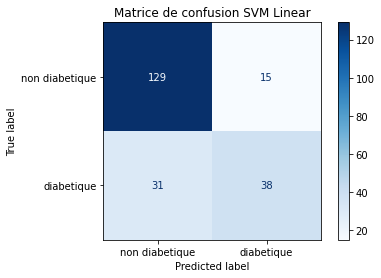

In [ ]:
# je distingue mes données d'entrainnement (apprentissage) et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
classifier = SVC(kernel='linear', C=0.001).fit(X_train, y_train)

# mesures
y_pred = classifier.predict(X_test)
print("Performance:", accuracy_score(y_test, y_pred))
print("Précision:", precision_score(y_test, y_pred))
print("Rappel:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
model_summary.append(dict(model='SVM Linear', accuracy_score=accuracy_score(y_test, y_pred)))

# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title('Matrice de confusion SVM Linear')
plt.show()

je peux conclure que :

- Le taux de bonne classification de mon modèle est de 78.40%
- Mon modèle n'est précis qu'à 71.6%
- Ce qui est réellement attendu est de 55.07%
- et enfin, mon f1_score est de 62.2%
- Dans ma matrice de confusion alors que 167 sujets ont correctement été prédits, 46 seulement ont été mal prédits mais seulement ceci n'ets pas bon car le nombre de non détéction est 31 sujets supérieur au nombre de fausse alarme 15 tel que vu en cours de TBD

### 2) Toujours en voulant créer un deuxième modèle svm, cette fois-ci je m'intérresse à un noyau dit "sigmoid"

Performance: 0.5258215962441315
Précision: 0.1
Rappel: 0.057971014492753624
F1-score: 0.07339449541284403


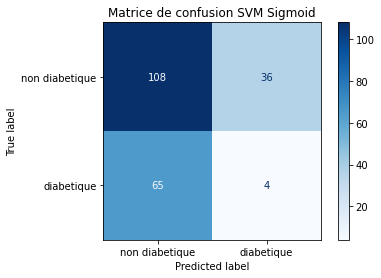

In [ ]:
# je distingue mes données d'entrainnement (apprentissage) et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
classifier = SVC(kernel='sigmoid').fit(X_train, y_train)

# Mesures
y_pred = classifier.predict(X_test)
print("Performance:", accuracy_score(y_test, y_pred))
print("Précision:", precision_score(y_test, y_pred))
print("Rappel:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
model_summary.append(dict(model='SVM Sigmoid', accuracy_score=accuracy_score(y_test, y_pred)))

# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title('Matrice de confusion SVM Sigmoid')
plt.show()

ici je peux conclure que :

- Le taux de bonne classification de mon modèle est de 52.58%
- Mon modèle semble n'être précis qu'à 10%
- Ce qui est réellement attendu est de 57.9%
- et enfin, mon f1_score est de 7.3%
- Dans ma matrice de confusion alors que 112 sujets ont correctement été prédits, 101 seulement ont été mal prédits ici aussi, ce n'est pas bon car le nombre de non détéction est 65 sujets supérieur au nombre de fausse alarme 35 tel que vu en cours de TBD

### 3) Voici le troisième et dernier modèle svm crée à l'aide d'un noyau dit "rbf"

Performance: 0.7652582159624414
Précision: 0.6666666666666666
Rappel: 0.5507246376811594
F1-score: 0.603174603174603


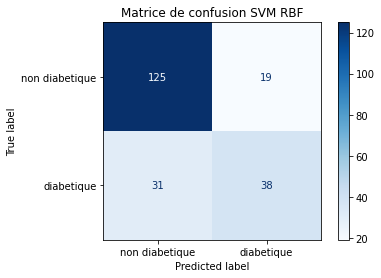

In [ ]:
# je distingue mes données d'entrainnement (apprentissage) et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
classifier = SVC(kernel='rbf', gamma=0.001).fit(X_train, y_train)

# Mesures
y_pred = classifier.predict(X_test)
print("Performance:", accuracy_score(y_test, y_pred))
print("Précision:", precision_score(y_test, y_pred))
print("Rappel:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
model_summary.append(dict(model='SVM RBF', accuracy_score=accuracy_score(y_test, y_pred)))

# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title('Matrice de confusion SVM RBF')
plt.show()

ici je conclus que :

- Le taux de bonne classification de mon modèle est de 76.52%
- Mon modèle semble est précis à 66.6%
- Ce qui est réellement attendu est de 55.07%
- et enfin, mon f1_score est de 60.3%
- Contrairement au précédent, dans ma matrice de confusion alors que 163 sujets ont correctement été prédits, 50 seulement ont été mal prédits ici aussi, ce n'est pas bon car le nombre de non détéction est 31 sujets supérieur au nombre de fausse alarme 19 tel que vu en cours de TBD

### De ces trois expériences j'ose donc conclure que :

* le premier modèle semble être le meilleur selon que son taux de bonne classification est élevé mais surtout, il est le plus précis.

### PARTIE ESTIMATION GAUSSIENNE

Un peu comme vu au cours, et appliqué au niveau du TER, ici, j'utilise un modèle gaussien

Performance: 0.7699530516431925
Précision: 0.6388888888888888
Rappel: 0.6666666666666666
F1-score: 0.6524822695035462


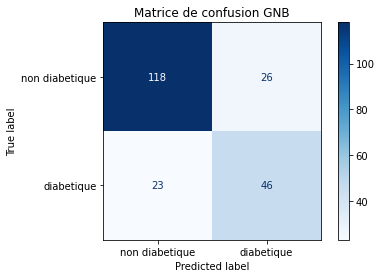

In [ ]:
# je distingue mes données d'entrainnement (apprentissage) et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
classifier = GaussianNB().fit(X_train, y_train)

# Mesures
y_pred = classifier.predict(X_test)
print("Performance:", accuracy_score(y_test, y_pred))
print("Précision:", precision_score(y_test, y_pred))
print("Rappel:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
model_summary.append(dict(model='GaussianNB', accuracy_score=accuracy_score(y_test, y_pred)))

# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title('Matrice de confusion GNB')
plt.show()

je me permets de conclure que :

- Le taux de bonne classification de mon modèle est de 76.9%
- Mon modèle semble est précis à 63.8%
- Ce qui est réellement attendu est de 66.6%
- et enfin, mon f1_score est de 65.2%
- Dans cette matrice de confusion alors que 164 (soit 1 de plus que le précédent) sujets ont correctement été prédits, 49 (soit 1 de moins que le précédent) seulement ont été mal prédits.

     on apprécie un peu mieux ce modèle car le nombre de non détéction est 23 sujets inférieur au nombre de fausse alarme 26 tel que vu en cours de TBD il est préférable d'avoir un modèle qui possède plus de personne fossement prédits comme étant malade que plus de personne malade faussement prédites comme n'étant pas malade.
     
     Mais seulement, comment faire pour avoir un modèle qui nous prédit au mieux nos sujets ? 
     
     la réponse se trouve dans la suite.

### Recherche de l'hyper parametre


un peu comme nous l'avons vu en tp, avec crossvalidation, la recherche de l'hyper paramètre concistait à rechercher le bon h qui offre un meilleure taux de bonne performance. Ici en utilisant le code fournit par la librairie sklearn, je traite les données. Il siède à signaler que éxécuter ce bout de code prendra un peu plus de temps.

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.735 (+/-0.099) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.752 (+/-0.068) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.685 (+/-0.062) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.758 (+/-0.104) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.646 (+/-0.049) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.714 (+/-0.071) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.633 (+/-0.054) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.693 (+/-0.062) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.759 (+/-0.087) for {'C': 1, 'kernel': 'linear'}
0.738 (+/-0.113) for {'C': 10, 'kernel': 'linear'}
0.733 (+/-0.090) for {'C': 100, 'kernel': 'linear'}
0.725 (+/-0.091) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full eva

### Le Meilleur modèle

    En partant des résultats obtenus dans la cellule précédente, on peut constater que le meilleur hyper paramètre est égale à 1 : 
    
    {'C': 1, 'kernel': 'linear'}.
    
    Et c'est ce que nous allons faire ci-dessous, en utiliisant à la fois notre meilleur modèle svm qui utilise un noyau linéaire nous allons remplacer la valeur du paramètre C=0.001 par C=1.

Performance: 0.7981220657276995
Précision: 0.7241379310344828
Rappel: 0.6086956521739131
F1-score: 0.6614173228346457


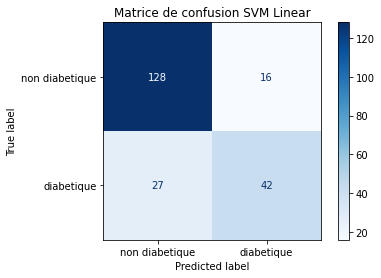

In [ ]:
# je distingue mes données d'entrainnement (apprentissage) et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
classifier = SVC(kernel='linear', C=1).fit(X_train, y_train)


# Metrics
y_pred = classifier.predict(X_test)
print("Performance:", accuracy_score(y_test, y_pred))
print("Précision:", precision_score(y_test, y_pred))
print("Rappel:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
model_summary.append(dict(model='SVM Linear(C=1)', accuracy_score=accuracy_score(y_test, y_pred)))

# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title('Matrice de confusion SVM Linear')
plt.show()

Nous osons donc dire que :

- Le meilleure taux de bonne classification est de 79.8%
- Mon modèle est précis à 72.4%
- Ce qui est réellement attendu est de 60.86%
- et enfin, mon f1_score est de 66.14%
- Enfin pour la matrice de confusion, on a probablement le nombre le plus élevés de sujets prédits correctement qui est de 170 sujets, 43 on été mal prédits ce qui est inférieur au nombre de fausse prédictions de la gaussienne (49). Alors certe, le nombre de sujets appartenant à la non detection est supérieur au nombre de sujet appartenant à la fausse alarme mais, il siède à signaler que ce modèle reste tout de même le meilleur.

## PETIT RESUME SUR MON MODELE

enfin nous utilisons notre model_summary pour en faire un DataFRame.

In [ ]:
df_sum

,model,accuracy_score
0,SVM Linear,0.784038
1,SVM Sigmoid,0.525822
2,SVM RBF,0.765258
3,GaussianNB,0.769953
4,SVM Linear(C=1),0.798122


In [ ]:
df_sum = pd.DataFrame(model_summary)

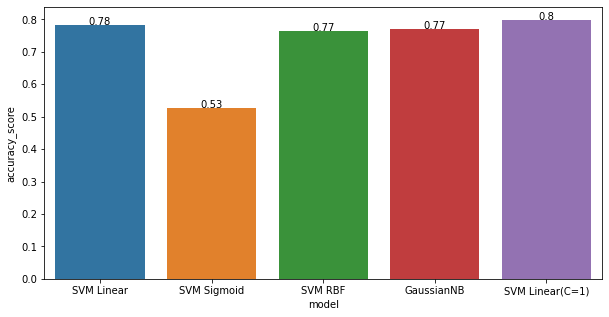

In [ ]:
figure = plt.figure(figsize=(10,5))
ax = sn.barplot(y='accuracy_score', x='model', data=df_sum)
# j'ajoute les valeurs
for index, row in df_sum.iterrows():
    ax.text(row.name,row.accuracy_score, round(row.accuracy_score,2), color='black', ha="center")

plt.show()

##### Et c'est ici, que je résume toutes mes solutions.

    comme vous pouvez le constater :

* le SVM Lienar avec l'hyper paramètre C=1 est le meilleur modèle, 
* suivit du SVM Linear tout court, 
* puis le SVM RBF
* ensuite vient la GAUSSIENNE
* puis enfin le SVM Sigmoid

                                                                          Data Science is fun 😎 TP Bonus made by me with ❤